In [1]:
# Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

# Problem on Salary dataset

In [3]:
# Importing the data 
data_train = pd.read_csv('E:\\download\\SalaryData_Train(1).csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_test = pd.read_csv('E:\\download\\SalaryData_Test(1).csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Exploratory data analysis

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
data_train.shape

(30161, 14)

In [7]:
data_test.shape

(15060, 14)

In [9]:
data_train[data_train.duplicated()].shape

(3258, 14)

In [22]:
train_data = data_train.drop_duplicates()
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
train_data.shape

(26903, 14)

In [23]:
train_data[train_data.duplicated()].shape

(0, 14)

In [25]:
data_test[data_test.duplicated()].shape

(930, 14)

In [26]:
test_data = data_test.drop_duplicates()
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [27]:
test_data[test_data.duplicated()].shape

(0, 14)

In [28]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [29]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [30]:
#Finding the special characters in the data frame 
train_data.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [31]:
#Finding the special characters in the data frame 
test_data.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

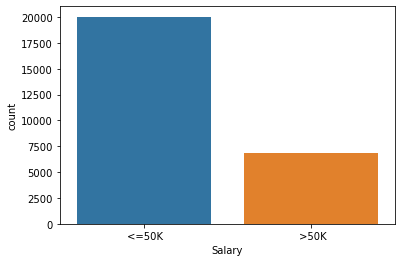

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [89]:
sns.countplot(x='Salary',data= train_data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train_data['Salary'].value_counts()

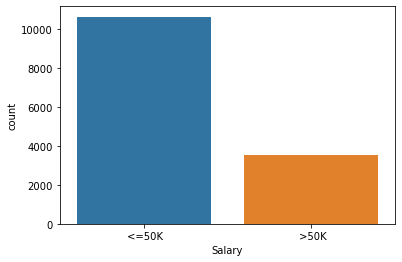

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [174]:
sns.countplot(x='Salary',data= test_data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test_data['Salary'].value_counts()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='workclass'>

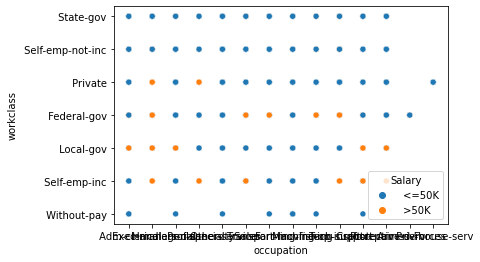

In [175]:
sns.scatterplot(train_data['occupation'],train_data['workclass'],hue=train_data['Salary'])

<AxesSubplot:xlabel='education'>

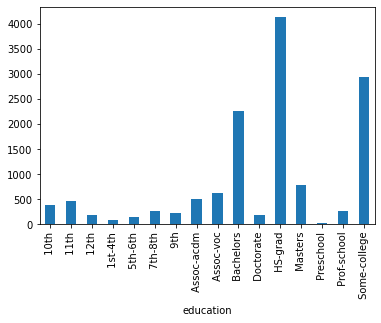

In [176]:
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar')

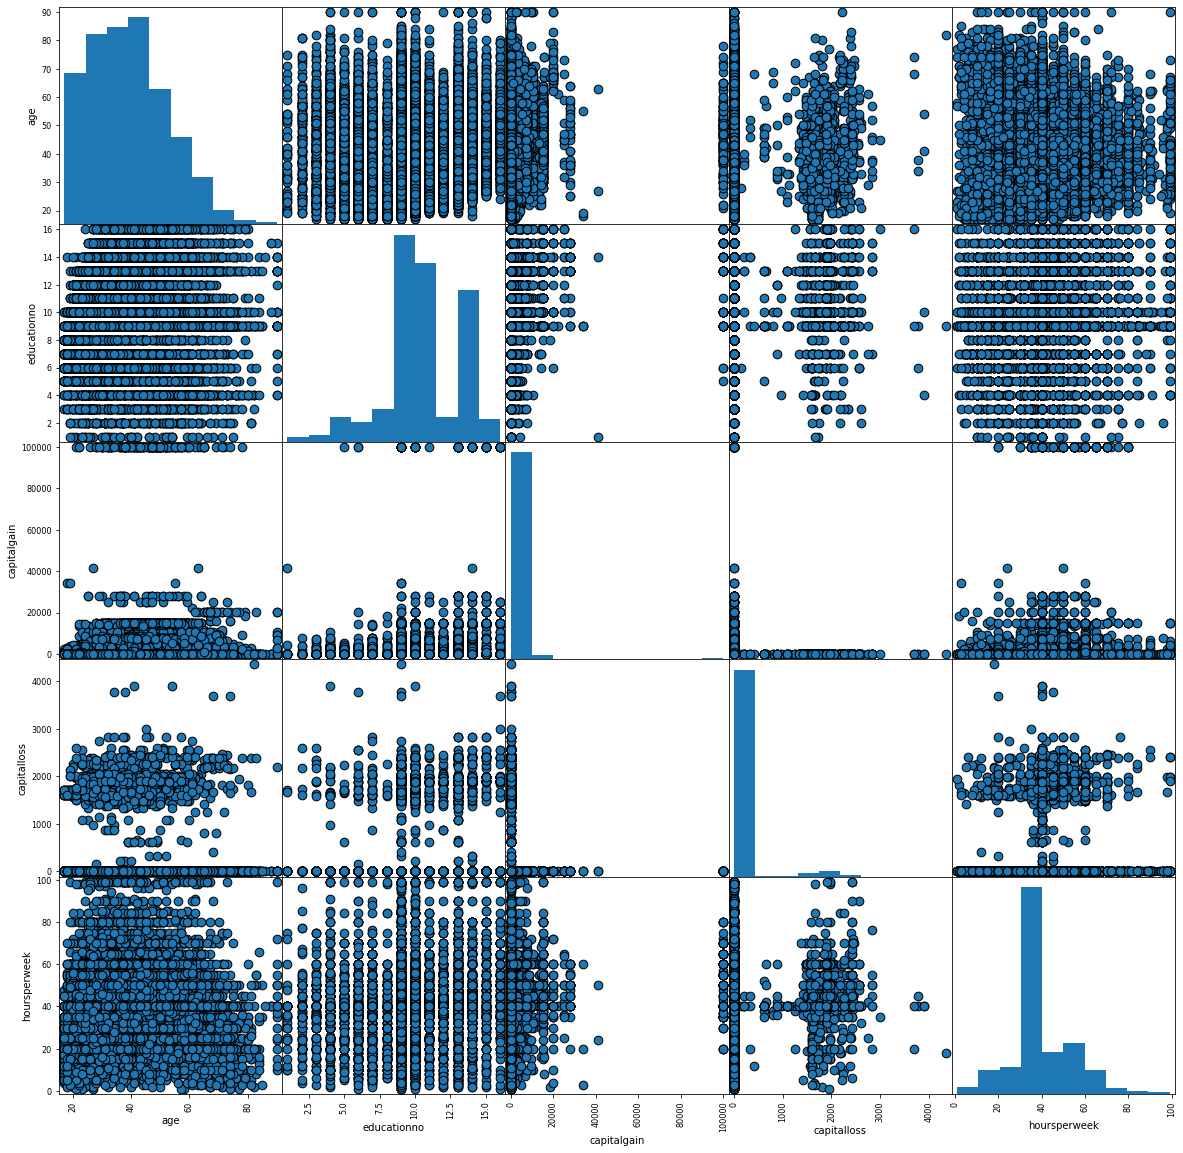

In [177]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(train_data,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

# Exploring categorical variables

In [33]:
# find categorical variables
cat1 = [var for var in train_data.columns if train_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(cat1)))
print('The categorical variables are :\n\n', cat1)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [34]:
# view the categorical variables
train_data[cat1].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [35]:
train_data[cat1].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [36]:
# Frequency counts of values in categorical variables
for var in cat1: 
     print(train_data[var].value_counts())

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other

In [37]:
# Frequency distribution of categorical variables
for var in cat1: 
    print(train_data[var].value_counts()/np.float(len(train_data)))

 Private             0.714158
 Self-emp-not-inc    0.090362
 Local-gov           0.074862
 State-gov           0.046575
 Self-emp-inc        0.038992
 Federal-gov         0.034531
 Without-pay         0.000520
Name: workclass, dtype: float64
 HS-grad         0.307326
 Some-college    0.219046
 Bachelors       0.167379
 Masters         0.057912
 Assoc-voc       0.046686
 Assoc-acdm      0.036948
 11th            0.034978
 10th            0.028621
 7th-8th         0.020109
 Prof-school     0.019775
 9th             0.016690
 Doctorate       0.013530
 12th            0.013307
 5th-6th         0.010519
 1st-4th         0.005538
 Preschool       0.001636
Name: education, dtype: float64
 Married-civ-spouse       0.459837
 Never-married            0.311750
 Divorced                 0.149017
 Separated                0.034494
 Widowed                  0.030368
 Married-spouse-absent    0.013753
 Married-AF-spouse        0.000781
Name: maritalstatus, dtype: float64
 Prof-specialty       0.14061

C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\399579896.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train_data[var].value_counts()/np.float(len(train_data)))
C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\399579896.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train_data[var].value_counts()/np.float(len(trai

In [38]:
# Checking labels in workclass variable
train_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [39]:
# Checking frequency distribution of values in workclass variable
train_data.workclass.value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

# Exploring occupation variable

In [40]:
# Checking labels in occupation variable
train_data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [41]:
# Checking frequency distribution of values in occupation variable
train_data.occupation.value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

# Exploring native_country variable

In [42]:
# Checking labels in native_country variable
train_data.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [43]:
# Checking frequency distribution of values in native_country variable
train_data.native.value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

# Cardinality Checking

In [44]:
for var in cat1:
     print(var, ' contains ', len(train_data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


# Exploring Numerical Variables

In [45]:
num1 = [var for var in train_data.columns if train_data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(num1)))
print('The numerical variables are :', num1)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [46]:
train_data[num1].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [47]:
train_data[num1].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# Declaring feature vector and target variable

In [48]:
X = train_data.drop(['Salary'], axis=1)
y = train_data['Salary']

In [49]:
# Spliting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [50]:
X_train.shape, X_test.shape

((18832, 13), (8071, 13))

# Feature Engineering

In [51]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [52]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [53]:
# Display categorical variables
cat2 = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat2

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [54]:
# Display numerical variables
num2 = [col for col in X_train.columns if X_train[col].dtypes != 'O']
num2

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [55]:
# Percentage of missing values in the categorical variables in training set
X_train[cat2].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [56]:
# Categorical variables with missing data
for col in cat2:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [57]:
# Impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

# Encoding categorical variables

In [58]:
X_train[cat2].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
15045,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States
27002,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
13028,Private,HS-grad,Married-civ-spouse,Other-service,Wife,White,Female,United-States
19009,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
15234,Private,1st-4th,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico


In [59]:
# Import category encoders
import category_encoders as ce

In [60]:
# Encoding remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [61]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
15045,52,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27002,40,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13028,56,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19009,44,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15234,31,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X_test.shape

(8071, 102)

In [65]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [66]:
X_train = norm_func(X_train)
X_test =  norm_func(X_test)

# SVM Model

In [68]:
from sklearn.svm import SVC
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(X_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [69]:
pred_test_linear = model_linear.predict(X_test)

In [70]:
np.mean(pred_test_linear==y_test) 

0.8402924049064552

In [71]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

In [72]:
np.mean(pred_test_poly==y_test)

0.8276545657291537

In [74]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)

In [75]:
np.mean(pred_test_rbf==y_test) 

0.8270350638086978

In [77]:
# Sigmoid
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(X_train,y_train)
pred_test_sig = model_rbf.predict(X_test)

In [78]:
np.mean(pred_test_sig==y_test)

0.8270350638086978

# SVM With GridSearch

In [79]:
# kernel = rbf
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [81]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [82]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8273146817034298)

In [83]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 78.52806343699666


In [86]:
confusion_matrix(y_test, y_pred)

array([[5508,  522],
       [1211,  830]], dtype=int64)

In [87]:
# kernel = linear
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [88]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [90]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8395813531057297)

In [94]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [96]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 78.52806343699666


In [95]:
confusion_matrix(y_test, y_pred)

array([[5508,  522],
       [1211,  830]], dtype=int64)

In [97]:
# kernel = poly
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [98]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [99]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.8277395638481757)

In [100]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [101]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 78.52806343699666


In [102]:
# kernel = sigmoid
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [103]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [104]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7698062787732003)

In [107]:
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [108]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 78.52806343699666


# Problem on forest fires dataset

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
# Importing data 
df = pd.read_csv('E:\\download\\forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [109]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [111]:
df[df.duplicated()].shape

(8, 31)

In [113]:
data = df.drop_duplicates()
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [114]:
data[data.duplicated()].shape

(0, 31)

In [116]:
data.shape

(509, 31)

In [117]:
# Finding the special characters in the data frame 
data.isin(['?']).sum(axis=0)

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [118]:
# Dropping the month and day columns
data.drop(["month","day"],axis=1,inplace =True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15196\3837628312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["month","day"],axis=1,inplace =True)


In [119]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [125]:
X = data.iloc[:,0:28]
Y = data.iloc[:,28]

In [123]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
Y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 509, dtype: object

In [127]:
# Normalising the data as there is scale difference
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [129]:
fires = norm_func(X)

In [130]:
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, stratify = Y)

In [149]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((381, 28), (381,), (128, 28), (128,))

# SVM Model

In [135]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [136]:
pred_test_linear = model_linear.predict(x_test)

In [137]:
np.mean(pred_test_linear==y_test) 

0.984375

Accuracy = 98.43%

In [138]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 98.4375


array([[34,  1],
       [ 1, 92]], dtype=int64)

In [139]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [140]:
pred_test_poly = model_poly.predict(x_test)

In [142]:
np.mean(pred_test_poly==y_test)

0.7578125

In [143]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [144]:
pred_test_rbf = model_rbf.predict(x_test)

In [145]:
np.mean(pred_test_rbf==y_test)

0.75

Accuracy = 75%

In [146]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [147]:
pred_test_sig = model_rbf.predict(x_test)

In [148]:
np.mean(pred_test_sig==y_test)

0.75

# SVM With GridSearch

In [150]:
# kernel = rbf
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [151]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['rbf'],
                          'random_state': [40]}])

In [152]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.734885290148448)

In [153]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 72.65625


In [155]:
confusion_matrix(y_test, y_pred)

array([[ 0, 35],
       [ 0, 93]], dtype=int64)

In [156]:
# kernel = linear
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [158]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['linear'],
                          'random_state': [40]}])

In [159]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.9895411605937922)

In [160]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [161]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 72.65625


In [162]:
confusion_matrix(y_test, y_pred)

array([[ 0, 35],
       [ 0, 93]], dtype=int64)

In [163]:
# kernel = poly
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [164]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['poly'],
                          'random_state': [40]}])

In [165]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.9631578947368421)

In [166]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [167]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 72.65625


In [168]:
# kernel = sigmoid
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [169]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1.0], 'gamma': [0.1], 'kernel': ['sigmoid'],
                          'random_state': [40]}])

In [170]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7296896086369771)

In [172]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [173]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 72.65625
